In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import import_ipynb
from scipy.stats import zscore
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

In [2]:
import Delhi_Analysis
import Demand_Data

importing Jupyter notebook from Delhi_Analysis.ipynb
importing Jupyter notebook from Demand_Data.ipynb


In [3]:
x = pd.concat([Delhi_Analysis.df , Demand_Data.df] , axis = 1)
df_AHC = pd.concat([Delhi_Analysis.df , Demand_Data.df] , axis = 1).apply(zscore)
df_KMEANS = pd.concat([Delhi_Analysis.df , Demand_Data.df] , axis = 1).apply(zscore)
m_dni = x['DNI(MW)'].mean()
s_dni = x['DNI(MW)'].std()
m_wind = x['WIND SPEED(MW)'].mean()
s_wind = x['WIND SPEED(MW)'].std()
m_demand = x['Demand(MW)'].mean()
s_demand = x['Demand(MW)'].std()


In [4]:
#without zscore


In [5]:
#Usinf AHC

c = [i for i in range(1 ,365)]
WCSS = []

for i in range(1 , 365) :
    AHC = AgglomerativeClustering(n_clusters = i , affinity= 'euclidean' , linkage= 'ward')
    df_AHC['cluster'] = AHC.fit_predict(df_AHC)
    wcss = 0
    for j in range (1 , i + 1):
        curr = np.array(df_AHC[df_AHC.cluster == j - 1])
        m = np.array(df_AHC[df_AHC.cluster == j - 1].median())
        w = 0;
        
        for k in range(np.size(curr , axis = 0)) :
            x = np.sum((curr[k] - m) ** 2)
            w += x;
        wcss +=  w
    df_AHC.drop('cluster' , axis = 1 , inplace  = True)
    WCSS.append(wcss)

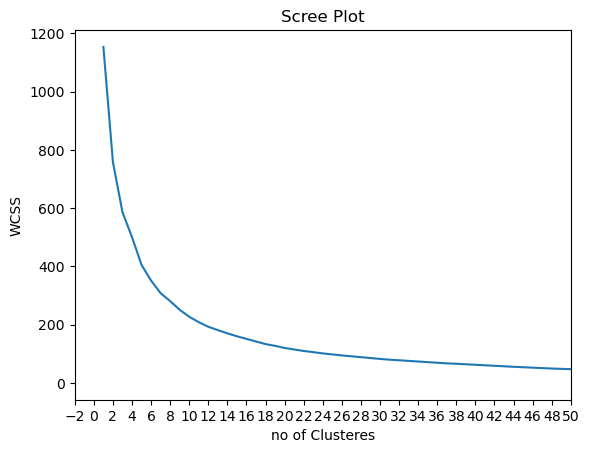

In [6]:
plt.plot(c , WCSS)
plt.xlabel('no of Clusteres')
plt.ylabel('WCSS')
plt.title('Scree Plot')
plt.xlim(-2 , 50)
plt.locator_params('x' , nbins =  50)

In [7]:
AHC = AgglomerativeClustering(n_clusters=6, affinity='euclidean' , linkage='ward')
df_AHC['clusters'] = AHC.fit_predict(df_AHC)
df_AHC['DNI(MW)'] = df_AHC['DNI(MW)']*s_dni + m_dni
df_AHC['WIND SPEED(MW)'] = df_AHC['WIND SPEED(MW)']*s_wind + m_wind
df_AHC['Demand(MW)'] = df_AHC['Demand(MW)']*s_demand + m_demand
res_AHC = df_AHC.groupby('clusters').median()
res_AHC['size'] = df_AHC.groupby('clusters').size()

res_AHC

,DNI(MW),WIND SPEED(MW),Demand(MW),size
clusters,,,,
0,29045.489667,3635.435849,4314.010408,132
1,25035.074710,4033.460165,3799.880319,68
2,23591.757242,20191.510197,3732.585702,21
3,35135.897462,1458.704214,4307.714105,44
4,35535.419255,14519.785926,4769.175529,22
5,35655.795691,3093.596755,4821.674957,79


In [8]:
#using kmeans
k_range = range(1 , 367)
wcss = []
for k in k_range : 
    km = KMeans(n_clusters = k)
    km.fit(df_KMEANS)
    wcss.append(km.inertia_)

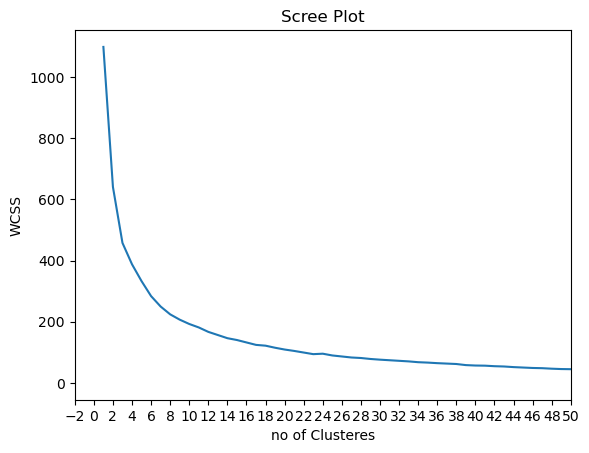

In [9]:
plt.plot(k_range , wcss)
plt.xlabel('no of Clusteres')
plt.ylabel('WCSS')
plt.title('Scree Plot')
plt.xlim(-2 , 50)
plt.locator_params('x' , nbins =  50)

In [10]:

KM = KMeans(n_clusters=6 )
df_KMEANS['clusters'] = KM.fit_predict(df_KMEANS)
df_KMEANS['clusters'] = AHC.fit_predict(df_AHC)
df_KMEANS['DNI(MW)'] = df_KMEANS['DNI(MW)']*s_dni + m_dni
df_KMEANS['WIND SPEED(MW)'] = df_KMEANS['WIND SPEED(MW)']*s_wind + m_wind
df_KMEANS['Demand(MW)'] = df_KMEANS['Demand(MW)']*s_demand + m_demand
res_KMEANS = df_KMEANS.groupby('clusters').median()    
res_KMEANS['size'] = df_KMEANS.groupby('clusters').size()




In [11]:
x = pd.read_csv('Central_Delhi.csv' , header = 10)
df_AHC['MO'] = x['MO']
df_AHC['DY'] = x['DY']
df_KMEANS['MO'] = x['MO']
df_KMEANS['DY'] = x['DY']

In [12]:

#loking for the patteren
pd.set_option('display.max_rows', 10)
df_AHC[df_AHC.clusters == 0]

,DNI(MW),WIND SPEED(MW),Demand(MW),clusters,MO,DY
4,25021.077450,3691.229955,4397.769986,0,1,5
5,28267.641931,2955.952303,4284.424756,0,1,6
11,24262.026036,1011.253965,4443.516480,0,1,12
14,26436.800321,3435.081966,4281.767912,0,1,15
19,27294.232478,3391.047199,4316.654984,0,1,20
...,...,...,...,...,...,...
342,25924.100683,1485.441394,4284.254823,0,12,8
343,27371.017447,2937.477947,4295.591992,0,12,9
345,28550.786506,2076.210814,4063.879147,0,12,11
356,24481.982979,4407.795025,4368.885069,0,12,22


In [13]:
df_KMEANS[df_KMEANS.clusters == 0]

,DNI(MW),WIND SPEED(MW),Demand(MW),clusters,MO,DY
0,23332.607970,2137.815072,3391.603263,0,1,1
1,24580.363721,1919.100921,4076.503742,0,1,2
2,25122.657566,1384.446282,3726.286650,0,1,3
3,24904.300310,2074.286334,3578.780824,0,1,4
4,25021.077450,3691.229955,4397.769986,0,1,5
...,...,...,...,...,...,...
345,28550.786506,2076.210814,4063.879147,0,12,11
346,29780.945700,3677.333684,3357.824648,0,12,12
356,24481.982979,4407.795025,4368.885069,0,12,22
357,24258.026819,5230.052882,4166.121207,0,12,23
